<a href="https://colab.research.google.com/github/andrewwells991/mds_thesis/blob/main/10_data_splitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Load packages and data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#Labeled dataset
data = '/content/gdrive/MyDrive/mds_thesis/5_labelled_data/proj_all.csv'
df = pd.read_csv(data)

<ipython-input-4-be426ea02bee>:3: DtypeWarning: Columns (8,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


##Split and process data

In [ ]:
#Setting variables
feature_names = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'longitude', 'latitude']
label = "building"

X = df[feature_names]
y = df[label]

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Combine training data
df_train = pd.concat([X_train, y_train], axis=1)

#Combine test data
df_test = pd.concat([X_test, y_test], axis=1)

##Saving unbalanced training, test data to Drive

In [ ]:
#Saving training data to Drive

path = '/content/gdrive/My Drive/mds_thesis/6_split_data/df_train.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:  
  df_train.to_csv(f)

In [ ]:
#Saving test data to Drive

path = '/content/gdrive/My Drive/mds_thesis/6_split_data/df_test.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:  
  df_test.to_csv(f)

##Over-sampling data

total class of 1 and 0: 1    1604276
0    1604276
Name: building, dtype: int64


[Text(0, 0, '1'), Text(1, 0, '0')]

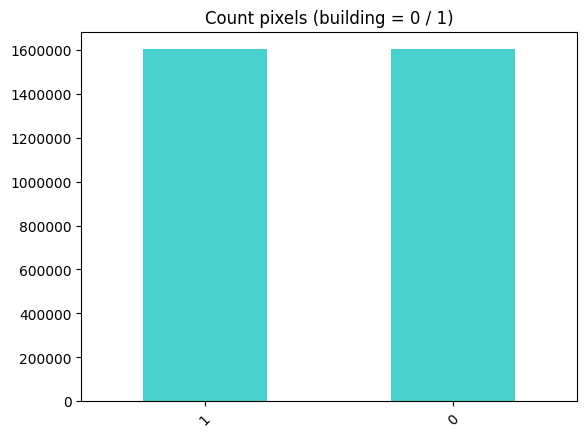

In [ ]:
# class count
class_count_0, class_count_1 = df['building'].value_counts()

# Separate class
class_0 = df[df['building'] == 0]
class_1 = df[df['building'] == 1]# print the shape of the class

#Random Over Sampling
class_1_over = class_1.sample(class_count_0, replace=True)

df_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",df_over['building'].value_counts())# plot the count after under-sampeling
ax = df_over['building'].value_counts().plot(kind='bar', title='Count pixels (building = 0 / 1)', color=['mediumturquoise'])

ax.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

##Splitting over-sampled data

In [ ]:
X_over = df_over[feature_names]
y_over = df_over[label]

# Split the data into training and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 42)

In [ ]:
#Combine training data
df_train_over = pd.concat([X_train_over, y_train_over], axis=1)

#Combine test data
df_test_over = pd.concat([X_test_over, y_test_over], axis=1)

##Saving over-sampled training, test data to Drive

In [ ]:
#Saving training data to Drive

path = '/content/gdrive/My Drive/mds_thesis/6_split_data/df_train_over.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:  
  df_train_over.to_csv(f)

In [ ]:
#Saving test data to Drive

path = '/content/gdrive/My Drive/mds_thesis/6_split_data/df_test_over.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:  
  df_test_over.to_csv(f)

##Splitting urban data (oversampled)

In [ ]:
df_urban = df[df['urban_rural'] == 'urban']

In [ ]:
print(df_urban.shape)
print(sum(df_urban['building']))

(677204, 27)
56337


total class of 1 and 0: 1    620867
0    620867
Name: building, dtype: int64


[Text(0, 0, '1'), Text(1, 0, '0')]

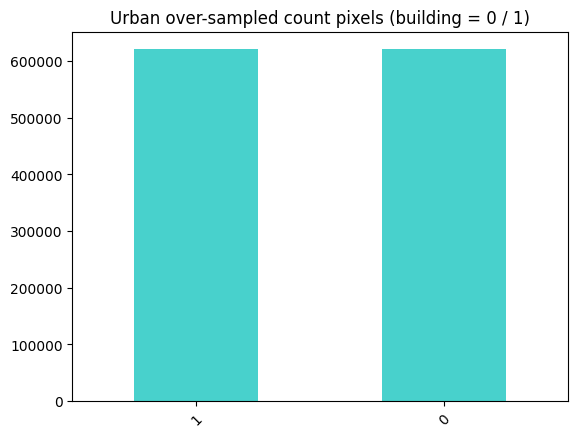

In [ ]:
# class count
class_count_0, class_count_1 = df_urban['building'].value_counts()

# Separate class
class_0 = df_urban[df_urban['building'] == 0]
class_1 = df_urban[df_urban['building'] == 1]# print the shape of the class

#Random Over Sampling
class_1_over = class_1.sample(class_count_0, replace=True)

df_urban_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",df_urban_over['building'].value_counts())

ax = df_urban_over['building'].value_counts().plot(kind='bar', title='Urban over-sampled count pixels (building = 0 / 1)', color=['mediumturquoise'])

ax.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

##Splitting over-sampled urban data

In [ ]:
X_over = df_urban_over[feature_names]
y_over = df_urban_over[label]

# Split the data into training and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 42)

In [ ]:
#Combine training data
df_urban_train_over = pd.concat([X_train_over, y_train_over], axis=1)

#Combine test data
df_urban_test_over = pd.concat([X_test_over, y_test_over], axis=1)

In [ ]:
print(df_urban_train_over.shape)
print(df_urban_test_over.shape)

(993387, 9)
(248347, 9)


##Saving urban over-sampled training, test data to Drive

In [ ]:
#Saving training data to Drive

path = '/content/gdrive/My Drive/mds_thesis/6_split_data/df_urban_train_over.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:  
  df_urban_train_over.to_csv(f)

In [ ]:
#Saving test data to Drive

path = '/content/gdrive/My Drive/mds_thesis/6_split_data/df_urban_test_over.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:  
  df_urban_test_over.to_csv(f)

##Splitting semi-urban data (oversampled)



In [ ]:
df_semi_urban = df[df['urban_rural'] == 'semi_urban']

In [ ]:
print(df_semi_urban.shape)
print(sum(df_semi_urban['building']))

(637560, 27)
11630


total class of 1 and 0: 1    625930
0    625930
Name: building, dtype: int64


[Text(0, 0, '1'), Text(1, 0, '0')]

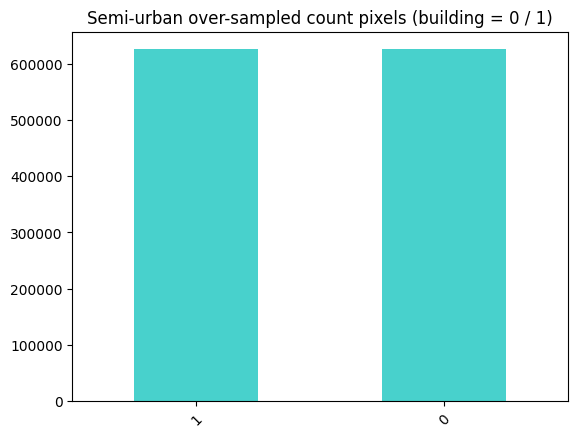

In [ ]:
# class count
class_count_0, class_count_1 = df_semi_urban['building'].value_counts()

# Separate class
class_0 = df_semi_urban[df_semi_urban['building'] == 0]
class_1 = df_semi_urban[df_semi_urban['building'] == 1]

#Random Over Sampling
class_1_over = class_1.sample(class_count_0, replace=True)

df_semi_urban_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",df_semi_urban_over['building'].value_counts())

ax = df_semi_urban_over['building'].value_counts().plot(kind='bar', title='Semi-urban over-sampled count pixels (building = 0 / 1)', color=['mediumturquoise'])

ax.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

##Splitting over-sampled semi-urban data

In [ ]:
X_over = df_semi_urban_over[feature_names]
y_over = df_semi_urban_over[label]

# Split the data into training and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 42)

In [ ]:
#Combine training data
df_semi_urban_train_over = pd.concat([X_train_over, y_train_over], axis=1)

#Combine test data
df_semi_urban_test_over = pd.concat([X_test_over, y_test_over], axis=1)

In [ ]:
print(df_semi_urban_train_over.shape)
print(df_semi_urban_test_over.shape)

(1001488, 9)
(250372, 9)


##Saving semi-urban over-sampled training, test data to Drive

In [ ]:
#Saving training data to Drive

path = '/content/gdrive/My Drive/mds_thesis/6_split_data/df_semi_urban_train_over.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:  
  df_semi_urban_train_over.to_csv(f)

In [ ]:
#Saving test data to Drive

path = '/content/gdrive/My Drive/mds_thesis/6_split_data/df_semi_urban_test_over.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:  
  df_semi_urban_test_over.to_csv(f)

##Splitting rural data (oversampled)

In [ ]:
df_rural = df[df['urban_rural'] == 'rural']

In [ ]:
print(df_rural.shape)
print(sum(df_rural['building']))

(358770, 27)
1291


total class of 1 and 0: 1    357479
0    357479
Name: building, dtype: int64


[Text(0, 0, '1'), Text(1, 0, '0')]

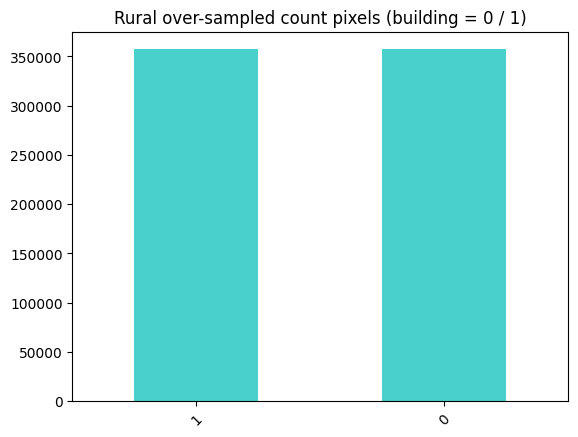

In [ ]:
# class count
class_count_0, class_count_1 = df_rural['building'].value_counts()

# Separate class
class_0 = df_rural[df_rural['building'] == 0]
class_1 = df_rural[df_rural['building'] == 1]

#Random Over Sampling
class_1_over = class_1.sample(class_count_0, replace=True)

df_rural_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:", df_rural_over['building'].value_counts())

ax = df_rural_over['building'].value_counts().plot(kind='bar', title='Rural over-sampled count pixels (building = 0 / 1)', color=['mediumturquoise'])

ax.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

##Splitting rural data (oversampled)

In [ ]:
X_over = df_rural_over[feature_names]
y_over = df_rural_over[label]

# Split the data into training and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 42)

In [ ]:
#Combine training data
df_rural_train_over = pd.concat([X_train_over, y_train_over], axis=1)

#Combine test data
df_rural_test_over = pd.concat([X_test_over, y_test_over], axis=1)

In [ ]:
print(df_rural_train_over.shape)
print(df_rural_test_over.shape)

(571966, 9)
(142992, 9)


##Saving rural over-sampled training, test data to Drive

In [ ]:
#Saving training data to Drive

path = '/content/gdrive/My Drive/mds_thesis/6_split_data/df_rural_train_over.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:  
  df_rural_train_over.to_csv(f)

In [ ]:
#Saving test data to Drive

path = '/content/gdrive/My Drive/mds_thesis/6_split_data/df_rural_test_over.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:  
  df_rural_test_over.to_csv(f)

##ADASYN

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN

In [ ]:
# Split the dataset
X = df[['B2', 'B3', 'B4', 'B8', 'B11', 'B12']]
y = df['building']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Rescale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train_scaled, y_train)

# Combine the original and synthetic data
X_train_ada = np.concatenate((X_train_scaled, X_train_balanced))
y_train_ada = np.concatenate((y_train, y_train_balanced))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_ada = RandomForestClassifier(random_state = 42)
rf_ada.fit(X_train_ada, y_train_ada)

RandomForestClassifier(random_state=42)